<a href="https://www.kaggle.com/code/azminetoushikwasi/lionel-messi-extended-eda-goals?scriptVersionId=115889810" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#282c5c;overflow:hidden;font-weight:500">LM10 - Extensive EDA & Analytics </br> Lionel Messi - All Club Goals Stats</div>

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Introduction</div>

# 1. Introduction

**Lionel Andrés Messi, also known as Leo Messi, s an Argentine professional footballer who plays as a forward for Ligue 1 club Paris Saint-Germain and captains the Argentina national team.**

- Born: June 24, 1987 (age 34 years), Rosario, Argentina
- Height: 1.69 m
- Spouse: Antonela Roccuzzo (m. 2017)
- Salary: 41 million USD (2022)
- Current teams: Paris Saint-Germain F.C. (#30 / Forward), Argentina national football team (#10 / Forward)
- Children: Mateo Messi Roccuzzo, Thiago Messi Roccuzzo, Ciro Messi Roccuzzo
- Awards: European Golden Shoe, FIFA World Player of the Year, MORE

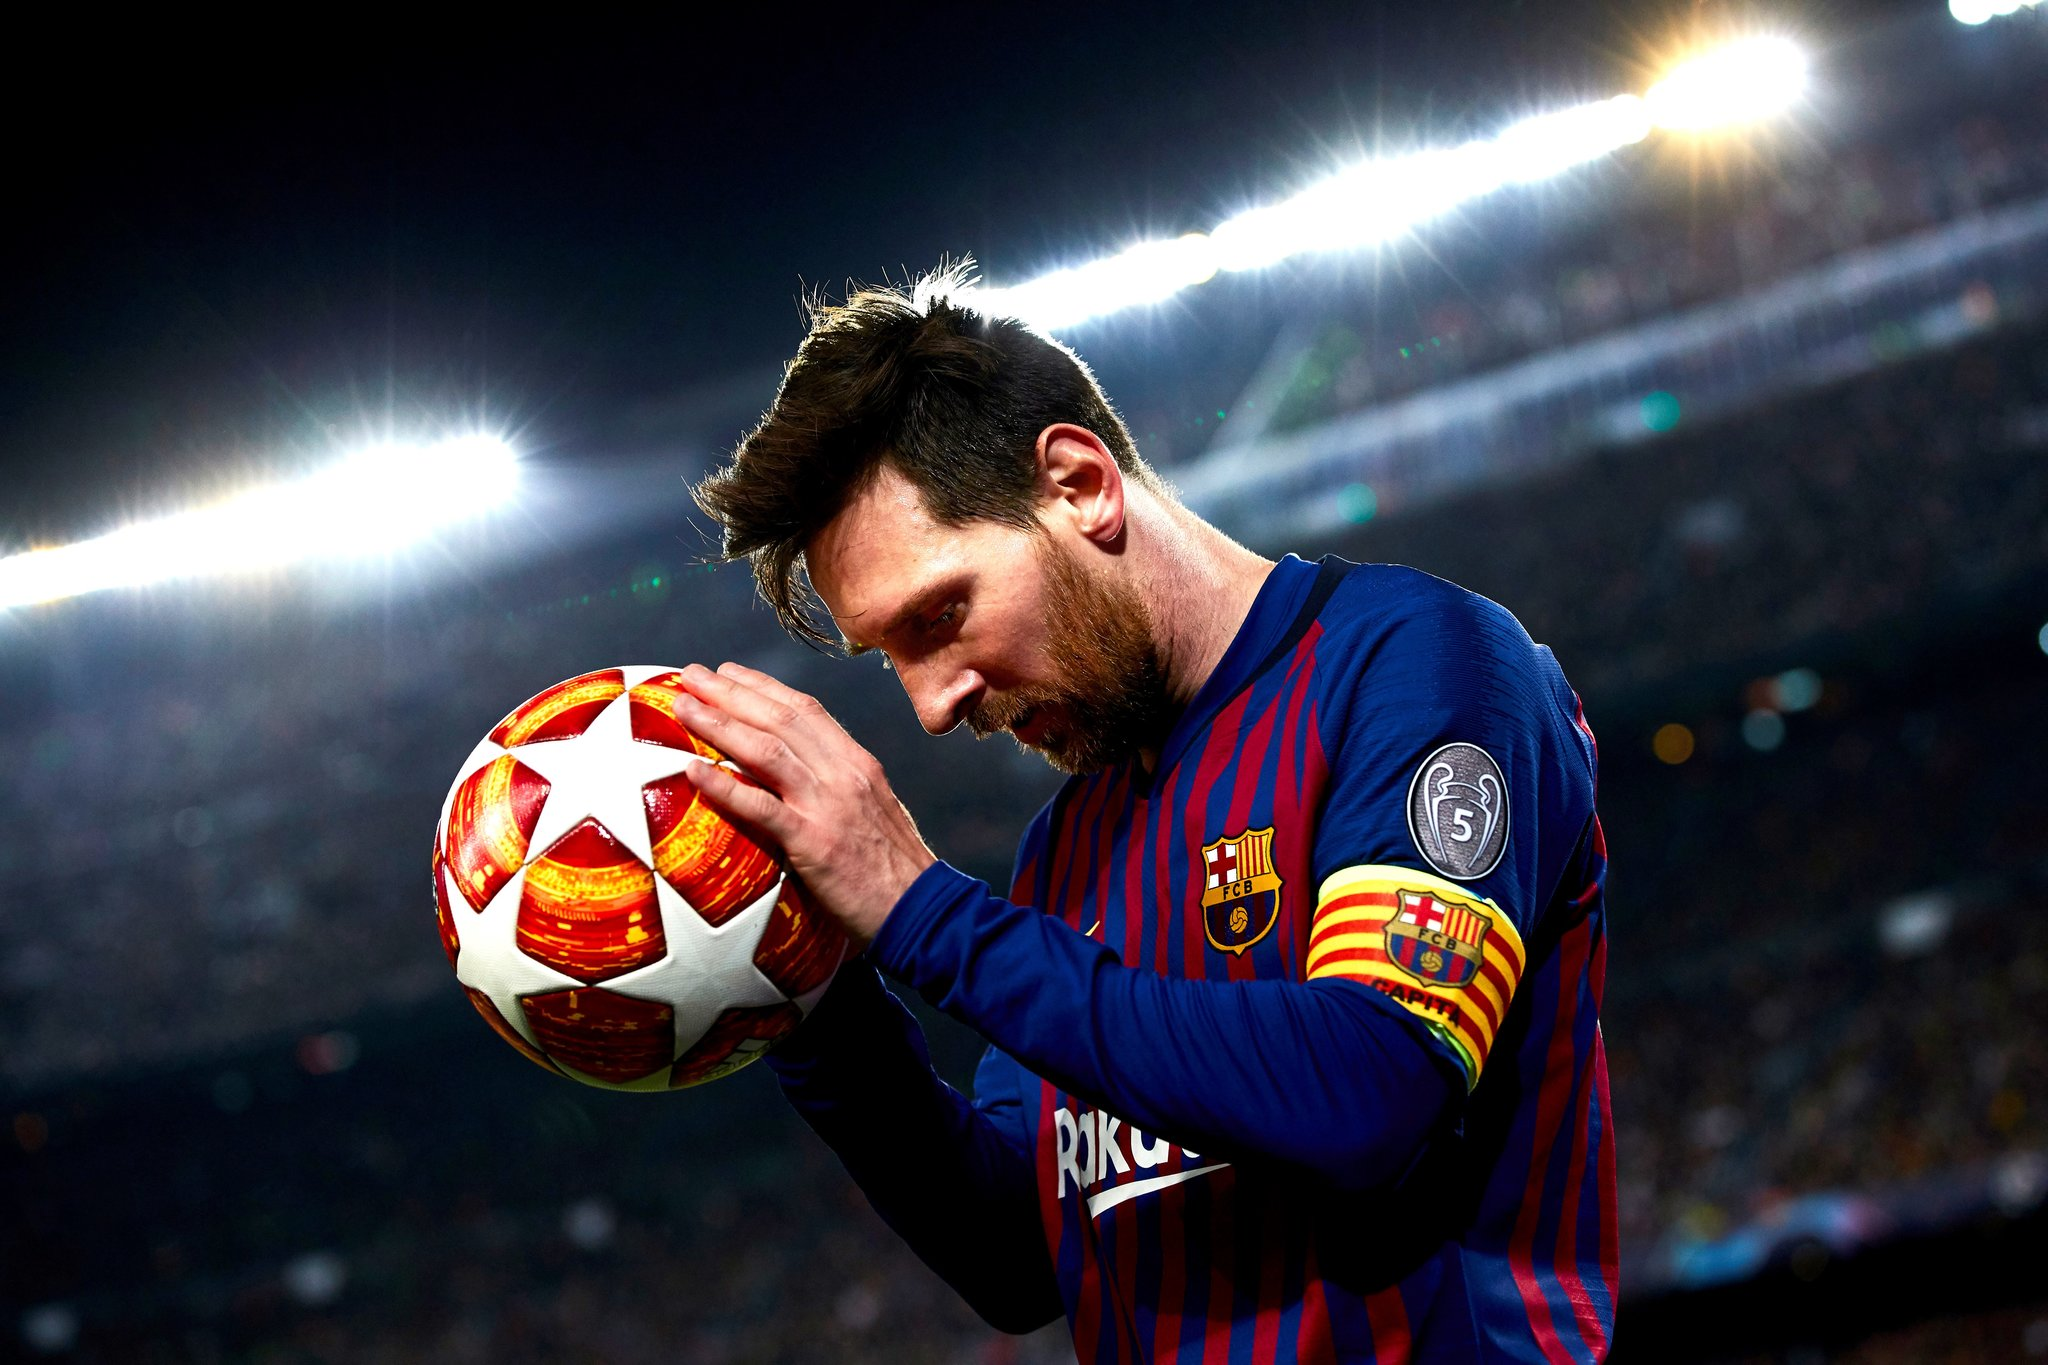

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Data, Modules Loading and Config</div>

# 2. Data, Modules Loading and Config

# 2.1. Moduules Loading

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from sklearn.linear_model import LinearRegression

# 2.2. Config

In [2]:
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

# 2.3. Data Loading

In [3]:
df=pd.read_csv("/kaggle/input/-lionel-messi-all-club-goals/data.csv",encoding = "ISO-8859-1")

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Basic Exploration</div>

# 3. Basic Exploration

In [4]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            697 non-null    object
 1   Competition       697 non-null    object
 2   Matchday          697 non-null    object
 3   Date              697 non-null    object
 4   Venue             697 non-null    object
 5   Club              697 non-null    object
 6   Opponent          697 non-null    object
 7   Result            697 non-null    object
 8   Playing_Position  697 non-null    object
 9   Minute            697 non-null    object
 10  At_score          697 non-null    object
 11  Type              696 non-null    object
 12  Goal_assist       484 non-null    object
dtypes: object(13)
memory usage: 70.9+ KB


In [6]:
df.describe(include=['object']).T

,count,unique,top,freq
Season,697,19,11-Dec,73
Competition,697,10,LaLiga,474
Matchday,697,48,Group Stage,80
Date,697,448,03/07/12,5
Venue,697,2,H,415
Club,697,2,FC Barcelona,672
Opponent,697,93,Sevilla FC,38
Result,697,51,4:00,47
Playing_Position,697,9,CF,273
Minute,697,106,55,13


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Exploritory Data Analysis of club Goals</div>

# 4. Exploritory Data Analysis of club Goals

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Goals per competition</div>

## 4.1. Goals per competition

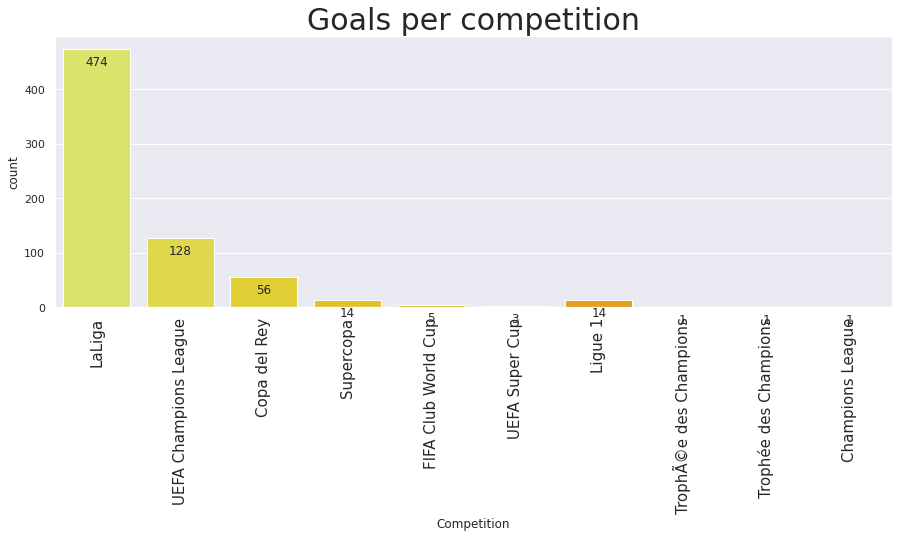

In [7]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Competition'],palette='Wistia')
p.axes.set_title("Goals per competition",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

### Observations: 
- Scored mostly in La-Liga.

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Goals per season</div>

## 4.2. Goals per season

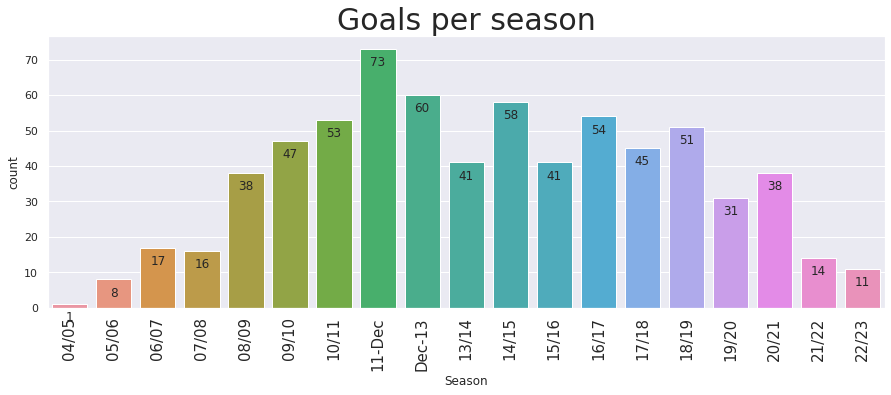

In [8]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Season'],hue_order=df.groupby('Competition'))
p.axes.set_title("Goals per season",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

### Observations: 
- Scored most goals in 2011/12. 
- Then, 2012-13. Those years are the golden time for his career.

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Goals per Clubs</div>

## 4.3. Goals per Clubs

<AxesSubplot:title={'center':'Goals per Clubs Played'}, ylabel='Club'>

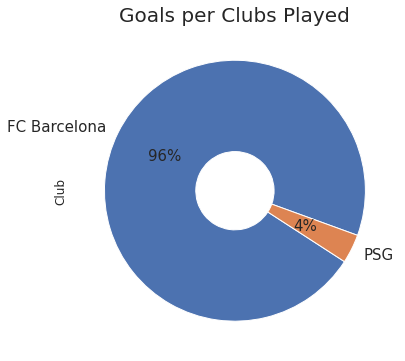

In [9]:
plt.figure(figsize=(6,6))
plt.title('Goals per Clubs Played', fontsize=20)
df.Club.value_counts().plot(kind='pie', labels=['FC Barcelona', 'PSG'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

### Observations: 
- Scored 98% goals for Barcelona.

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Goals per Playing position</div>

## 4.4. Goals per playing Position

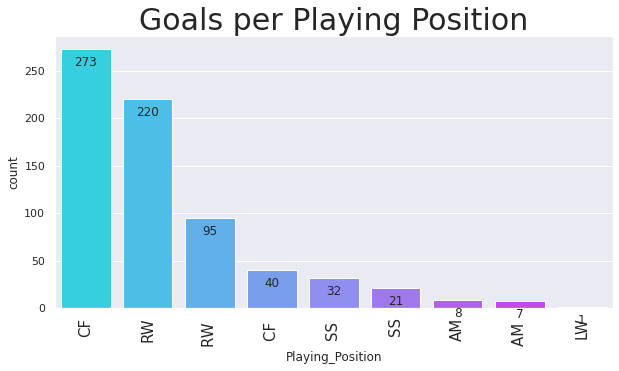

In [10]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Playing_Position'],palette='cool',order=df.Playing_Position.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Playing Position",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

### Observations: 
- Played best as Center Forward; then as Right Winger.

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Goals per Game Minutes</div>

## 4.5. Goals per Game Minute

In [11]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")

In [12]:
df.loc[df.Minute.str[:3]=='45+', 'Minute'] = '1stE'
df.loc[df.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
df.loc[df.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'

In [13]:
mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]

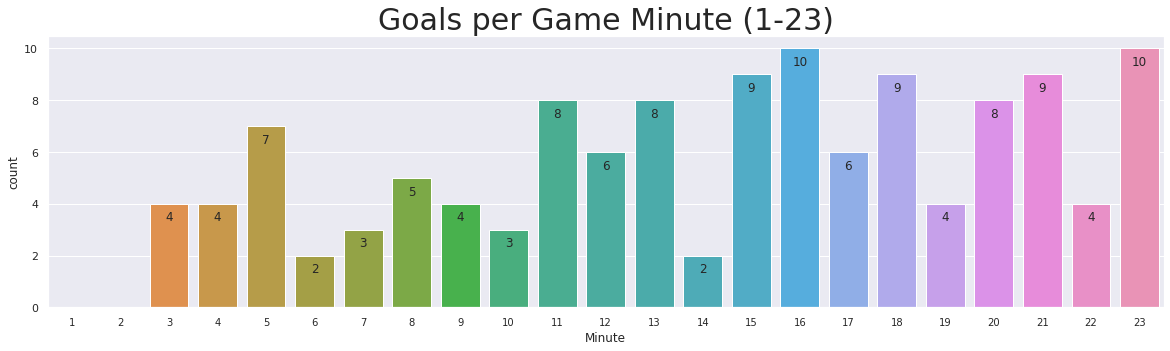

In [14]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10)
p=sns.countplot(df['Minute'],order=mins1)
p.axes.set_title("Goals per Game Minute (1-23)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

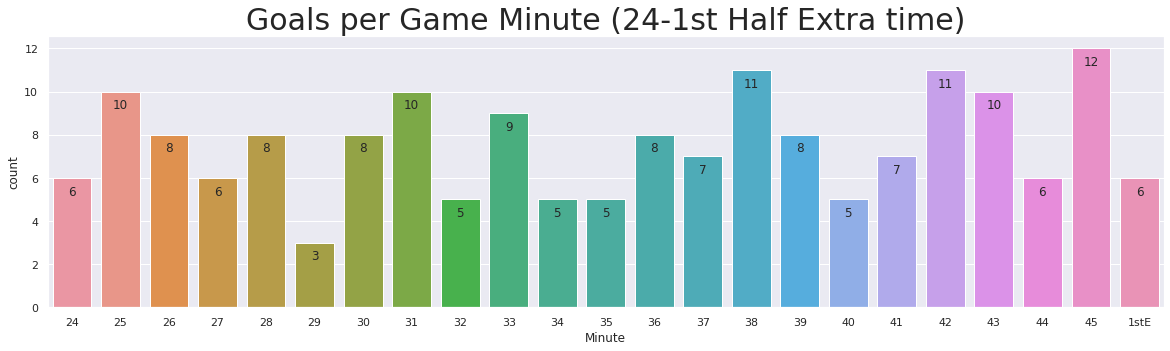

In [15]:
p=sns.countplot(df['Minute'],order=mins2)
p.axes.set_title("Goals per Game Minute (24-1st Half Extra time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

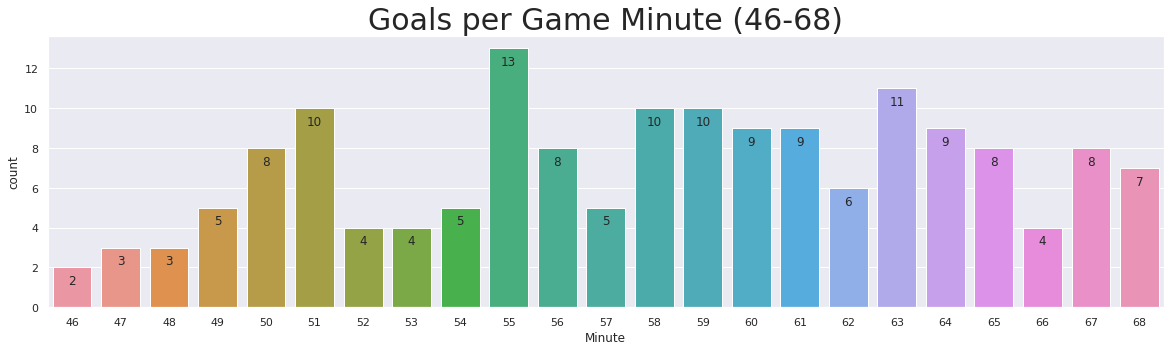

In [16]:
p=sns.countplot(df['Minute'],order=mins3)
p.axes.set_title("Goals per Game Minute (46-68)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

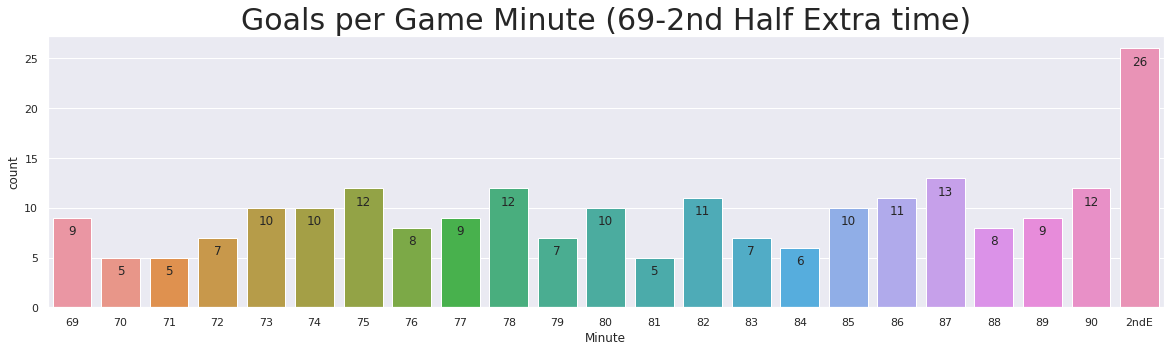

In [17]:
p=sns.countplot(df['Minute'],order=mins4)
p.axes.set_title("Goals per Game Minute (69-2nd Half Extra time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

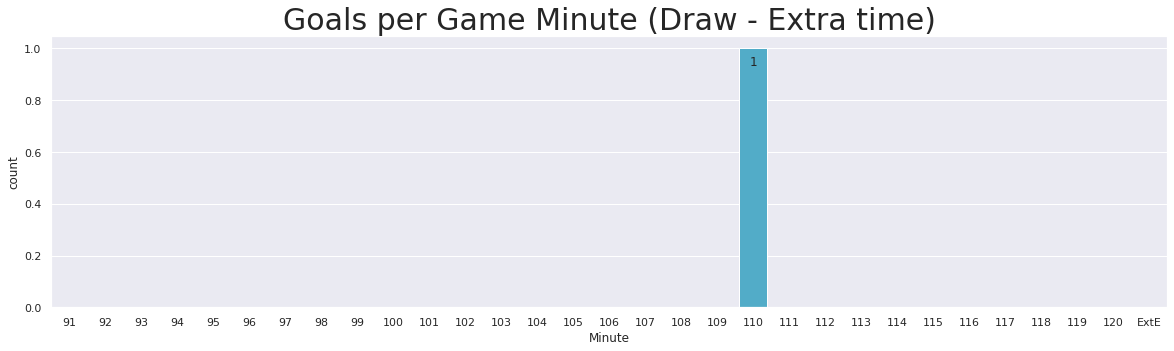

In [18]:
p=sns.countplot(df['Minute'],order=mins5)
p.axes.set_title("Goals per Game Minute (Draw - Extra time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

### Observations: 
- Havesn't scored in 1st and 2nd Minutes only!!!

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Goals per Type of Goals</div>

## 4.6. Goals per Type_of_goal

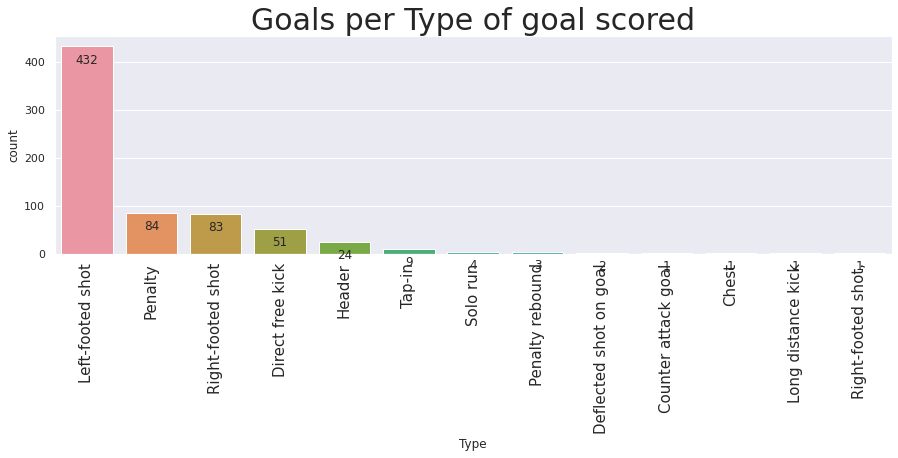

In [19]:
sns.set(rc={'figure.figsize':(15,4)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Type'],hue_order=df.groupby('Competition'),order=df.Type.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Type of goal scored",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

### Observations: 
- He is a left foot based - dependent player.

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Scoreline After Goals</div>

## 4.7. Scoreline after goal

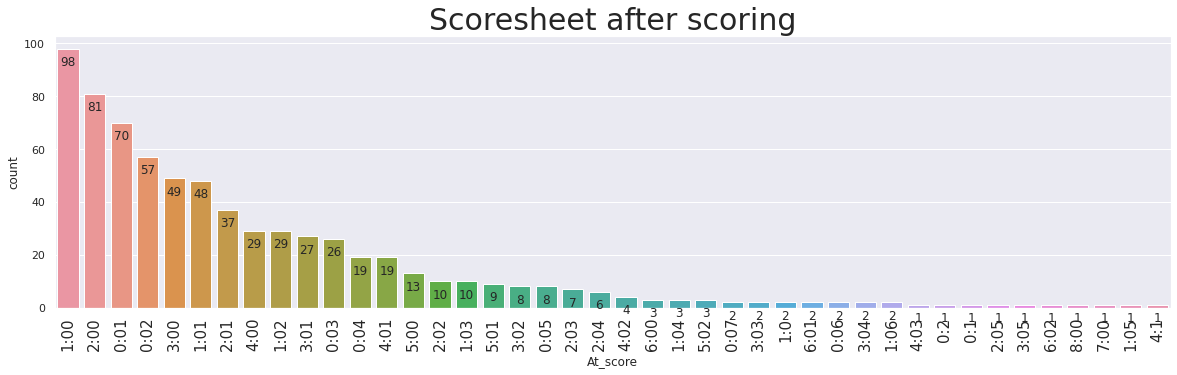

In [20]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['At_score'],hue_order=df.groupby('Competition'),order=df.At_score.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Scoresheet after scoring",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

### Observations: 
- Scored most of the opening goals.

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Opponents</div>

## 4.8. Opponents

Text(0.5, 1.0, 'Goals per Opponent')

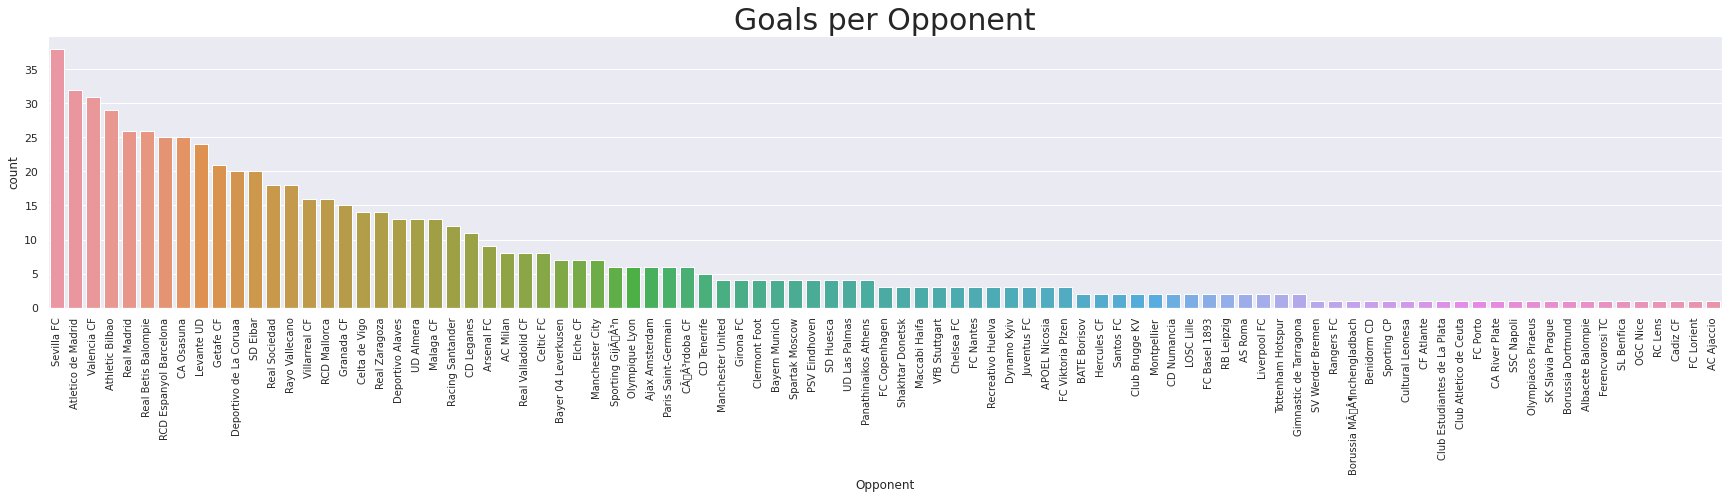

In [21]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Opponent'],hue_order=df.groupby('Competition'),order=df.Opponent.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Opponent",fontsize=30)

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Favorite Opponents</div>

## 4.9. Favourite Opponents

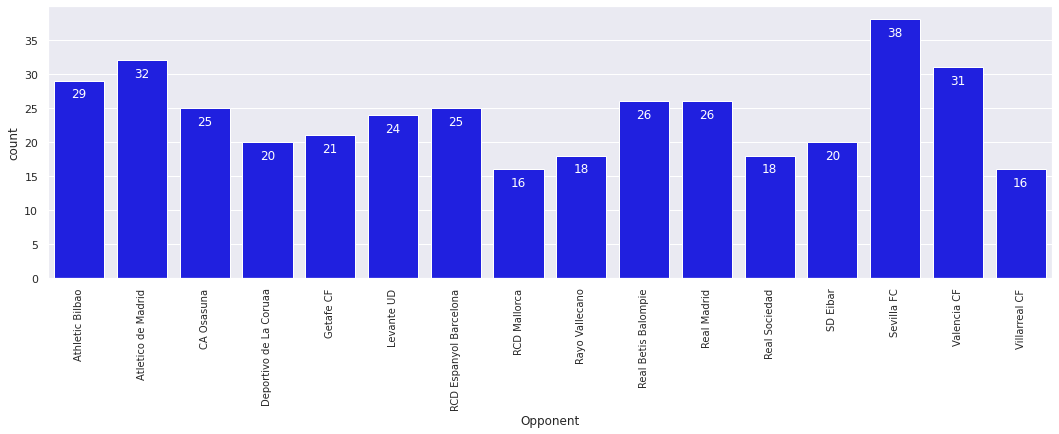

In [22]:
sns.set(rc={'figure.figsize':(18,5)})
opponents_df=df.groupby('Opponent').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=10,rotation='vertical')
p=sns.barplot(x=fav_opponents_df['Opponent'],y=fav_opponents_df['count'],color="blue")
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20,color='white')

### Observations: 
- Sevilla, Atletco Madrid and Valencia -  are his favourite opponents.

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Assisted By</div>

## 4.10. Assist

Text(0.5, 1.0, 'Goals Assist')

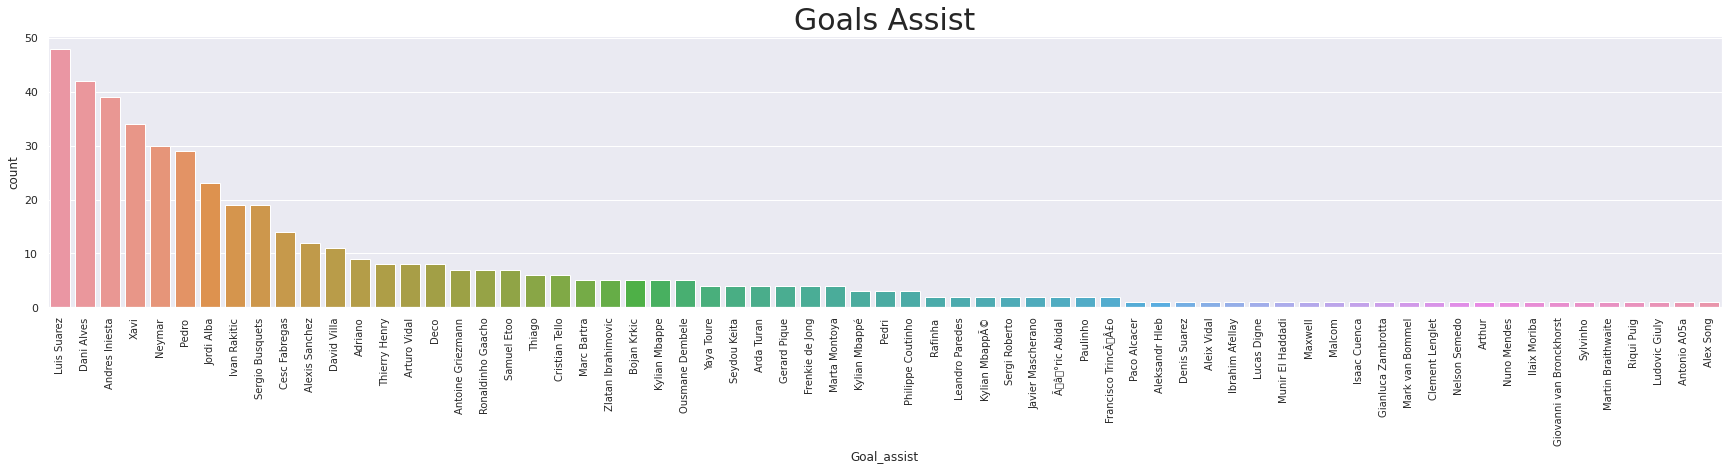

In [23]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(fontsize=10,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=df.Goal_assist.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals Assist",fontsize=30)

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Most Assisted By</div>

## 4.11. Most Assisted by

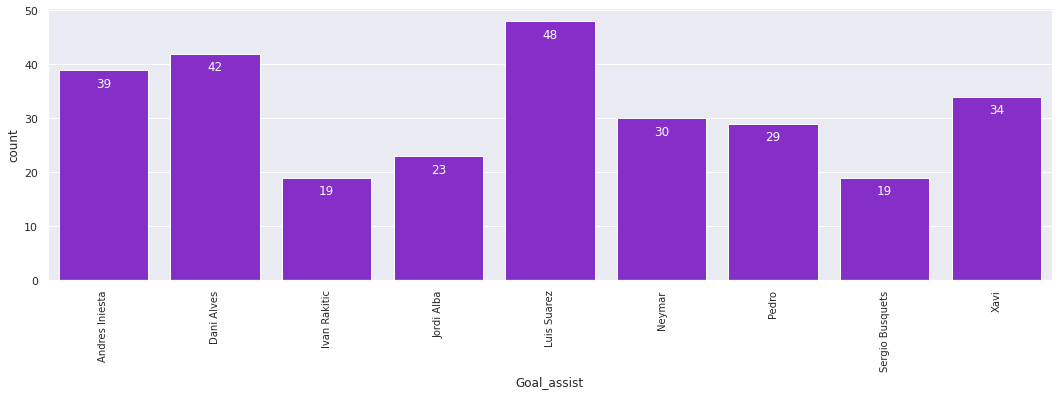

In [24]:
sns.set(rc={'figure.figsize':(18,5)})
opponents_df=df.groupby('Goal_assist').size().reset_index(name='count')
fav_opponents_df=opponents_df[opponents_df["count"]>15]
plt.xticks(fontsize=10,rotation='vertical')
p=sns.barplot(x=fav_opponents_df['Goal_assist'],y=fav_opponents_df['count'],color="#8a15e1")
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20,color='white')

### Observations: 
- uarex assisted him most, followed by Dani Alves

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Goals per Venue</div>

## 4.12. Home - Away goals

<AxesSubplot:title={'center':'Goals per venue'}, ylabel='Venue'>

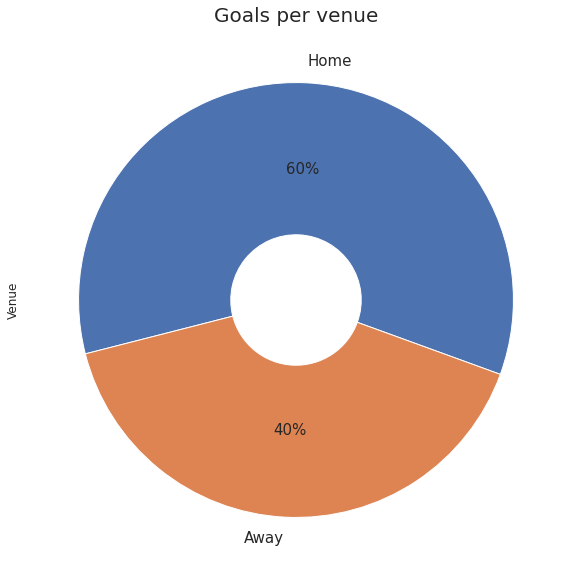

In [25]:
plt.figure(figsize=(30,10))
plt.title('Goals per venue', fontsize=20)
df.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

### Observations: 
- Scored most at homes.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Career Goals Analysis</div>

# 6. Career Goals Analysis

### Observations: 
- Won 372 matches; lost 21, Drawed 46

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Goal Timeline Analysis</div>

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Goals Calender</div>

## 7.2. Goals Calender

In [26]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%y-%m-%d')
df_g = df.Date.value_counts().rename_axis('Date').reset_index(name='counts')
df_g=df_g.sort_values(by="Date")
plt.figure(figsize=(10,10))
trace1 = go.Scatter(x=df_g.Date,
                    y=df_g.counts,
                    name = "Messi Total Goals Time graph",
                    line = dict(color = 'red'),
                    opacity = 0.4)

layout = dict(title='Messi Goals Calender',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

<Figure size 720x720 with 0 Axes>

<div style="padding:20px;color:white;margin:0;font-size:180%;text-align:center;display:fill;border-radius:5px;background-color:#1020e0;overflow:hidden;font-weight:500">Goals per year</div>

## 7.3. Goals per year

In [27]:
df_c = pd.DataFrame(pd.to_datetime(df['Date']).dt.strftime('%y-%m-%d')) 
df_c['year'] = pd.to_datetime(df_c['Date']).dt.strftime('%Y')
df_c['month'] = pd.to_datetime(df_c['Date']).dt.strftime('%m')

In [28]:
df_y = df_c.year.value_counts().rename_axis('Year').reset_index(name='counts')
df_y = df_y.sort_values(by="Year")

plt.figure(figsize=(10,10))
trace1 = go.Scatter(x=df_y.Year,
                    y=df_y.counts,
                    name = "Messi Total Goals Time graph",
                    line = dict(color = 'green'),
                    opacity = 0.8,
                    marker=dict(
                        color='white',
                        size=10,
                        line=dict(
                            width=12
                        )))

layout = dict(title='Messi Goals - per Year',)

fig = dict(data=[trace1], layout=layout)

iplot(fig)

<Figure size 720x720 with 0 Axes>

In [29]:
df_m = df_c.month.value_counts().rename_axis('Month').reset_index(name='counts')
df_m = df_m.sort_values(by="Month")

plt.figure(figsize=(10,10))
trace2 = go.Scatter(x=df_m.Month,
                    y=df_m.counts,
                    name = "Messi Total Goals Time graph",
                    line = dict(color = 'red'),
                    opacity = 0.4,
                    marker=dict(
                        color='white',
                        size=10,
                        line=dict(
                            width=12
                        )))

layout2 = dict(title='Messi Goals - per month (Jan-Dec)',)

fig2 = dict(data=[trace2], layout=layout2)

iplot(fig2)

<Figure size 720x720 with 0 Axes>

### Observations: 
- Scored most goals in he last quarter of the year.

<div style="padding:20px;color:white;margin:0;font-size:350%;text-align:center;display:fill;border-radius:5px;background-color:#212f85;overflow:hidden;font-weight:500">Thank You</div>

# Fork, Upvote, Share,Support